# Projeto 1: Modelagem do sistema de lagoas aeradas de uma indústria de papel e celulose

##### O estudo de caso consiste no tratamento de dados de um sistema de tratamento de efluentes de uma indústria de papel e celulose. O sistema basicamente é composto por: decantadores, lagoas aeradas e etc (processo representado na Figura abaixo).
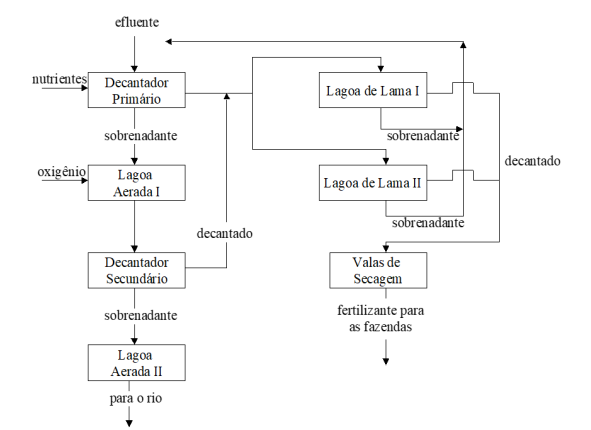

No presente estudo, focaremos em **dados obtidos a partir do processo de tratamento dos efluentes em uma lagoa aerada**. Os dados foram obtidos ao longo de 4 anos, através de medidas diárias de umas variáveis. Com isso, foi possíveis se contruir um banco de dados com **1427 amostras e 12 variáveis.**
As variáveis medidas no sistema são:
- DQO: Demanda Química de Oxigênio (mg/L)
- DBO: Demanda Biológica de Oxigênio (mg/L)
- COL: Cor (mg/L)
- COND: Condutividade (us/cm)
- FR: Vazão (m³/dia)
- AMN: Concetração de amônia (mg/L)
- NN: Concentração de nitrato (mg/L)
- pH: pH
- PP: Produção de papel (t/dia)
- POLP: Produção de polpa (t/dia)
- RF: Precipitação (mm/dia)
- T: Temperatura (°C)
- SST: Suspensão de Sòlidos Totais (mg/L)

A partir dos dados obtidos no processo o **Cientista de dados deverá responder as seguintes questões:**
- É possível propor um modelo para predição da DBO, DQO ou de outro parâmetro de qualidade que justifique a modelagem?
- É possível propor um ou mais modelos de classificação/agrupamento das variáveis considerando diferentes comportamentos observados nos dados?
- A informação da série temporal é importante para os seus modelos? Como você lidaria com os valores faltantes?
- Quais parâmetros de qualidade possuem maior incerteza (pesquisa na literatura)? Com base nessa resposta, qual parâmetro de qualidade que representa a degradação da matéria orgânica você escolheria como variável a ser predita?
- A qualidade das medições influencia na avaliação do viés-variância dos modelos?
- A análise exploratória, temporal, agrupamentos, correlações, distribuições, outliers, etc. trazem informações relevantes para o problema?
- Que outras perguntas poderiam nortear novos estudos?

## Importando bibliotecas

In [1]:
import matplotlib.pyplot as plt
import missingno
import numpy as np
import pandas as pd
import seaborn as sns

## Importando o banco de dados e realizando análise preliminar dos dados

In [2]:
df = pd.read_csv(r"C:\Users\yagom\OneDrive - Universidade Federal da Bahia\Doutorado\Disciplinas\Ciência de dados\Projeto 1 - Lagoa aerada\Dados Brutos.csv")
df = df.replace({',': '.'}, regex=True)
df

Datein  FR(m3/dia) BODin (ppm)  CODin (ppm)  SSin(ppm)  pHin  \
0      9/1/1996       79757         236        465.0        NaN  6.65   
1      9/2/1996       78818         270        483.0        NaN  6.04   
2      9/3/1996       82039         292        571.0        NaN  5.39   
3      9/4/1996       79501         264        461.0        NaN  5.92   
4      9/5/1996       82461         299        471.0      181.0  6.11   
...         ...         ...         ...          ...        ...   ...   
1425  7/27/2000       52215         367        751.0      250.0  7.44   
1426  7/28/2000       53216         324        751.0      145.0  7.38   
1427  7/29/2000       51561         344        701.0       96.0  7.36   
1428  7/30/2000       51654         303        703.0      105.0  7.29   
1429  7/31/2000       51662         324        689.0      118.0  7.28   

     NAmin(ppm) NNin (ppm) Pin (ppm)  Colin(ppm)  ... Pap (ton/dia)  \
0           NaN        NaN       NaN       356.0  ...         962.1   
1           NaN       0.26       NaN       433.0  ...         986.8   
2           NaN       0.29       NaN       287.0  ...          1065   
3           NaN       0.75       NaN       406.0  ...         879.7   
4           NaN        NaN       NaN       406.0  ...         985.8   
...         ...        ...       ...         ...  ...           ...   
1425      0.149        NaN       NaN       367.0  ...        1077.7   
1426      0.192        NaN      1.54       324.0  ...         945.4   
1427        NaN        NaN       NaN       344.0  ...        1062.5   
1428        NaN        NaN       NaN       303.0  ...        1061.8   
1429       0.26     0.7488       NaN       324.0  ...         937.2   

      Unnamed: 15    Dateout BODout(ppm) CODout (ppm)  SSout(ppm) Colout(ppm)  \
0             NaN        NaN         NaN          NaN         NaN         NaN   
1             NaN        NaN         NaN          NaN         NaN         NaN   
2             NaN   9/3/1996          74        245.0         NaN       311.0   
3             NaN   9/4/1996          88        237.0         NaN       298.0   
4             NaN   9/5/1996          67        221.0        37.0       297.0   
...           ...        ...         ...          ...         ...         ...   
1425          NaN  7/27/2000         159        476.0         NaN       159.0   
1426          NaN  7/28/2000         150        478.0         NaN       150.0   
1427          NaN  7/29/2000         137        446.0         NaN       137.0   
1428          NaN  7/30/2000         124        411.0         NaN       124.0   
1429          NaN  7/31/2000         147        451.0         NaN       147.0   

     Tout(°C)  Condout  FRout(m3/dia)  
0         NaN      NaN            NaN  
1         NaN      NaN            NaN  
2        33.5   1190.0        84097.0  
3          33   1140.0        79542.0  
4          33   1115.0        83814.0  
...       ...      ...            ...  
1425       32   2230.0        52220.0  
1426       32   2390.0        53216.0  
1427       32   2340.0        51561.0  
1428       31   2270.0        51654.0  
1429       32   1971.0        51662.0  

[1430 rows x 24 columns]

### <span style='color:red'> Resposta Questão 1: É possível propor um modelo para predição da DBO, DQO ou de outro parâmetro de qualidade que justifique a modelagem? <span> 
    
<b>Sim, a partir das variáveis medidas presentes no banco de dados é possível se obter modelos relativamente confiáveis para predição da qualidade do efluente baseado nas variávies de saída DBO e DQO. Além de outras variáveis, como sólidos em suspensão ou mesmo a cor do efluente. Essas variáveis também podem representar a qualidade de saída do efluente no processo.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Datein         1430 non-null   object 
 1   FR(m3/dia)     1430 non-null   int64  
 2   BODin (ppm)    1341 non-null   object 
 3   CODin (ppm)    1341 non-null   float64
 4   SSin(ppm)      568 non-null    float64
 5   pHin           1377 non-null   object 
 6   NAmin(ppm)     660 non-null    object 
 7   NNin (ppm)     279 non-null    object 
 8   Pin (ppm)      260 non-null    object 
 9   Colin(ppm)     1379 non-null   float64
 10  Tin(°C)        963 non-null    object 
 11  Condin L1      1374 non-null   float64
 12  RF(mm)         1175 non-null   object 
 13  Pulp(ton/dia)  1327 non-null   object 
 14  Pap (ton/dia)  1338 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Dateout        1428 non-null   object 
 17  BODout(ppm)    1343 non-null   object 
 18  CODout (

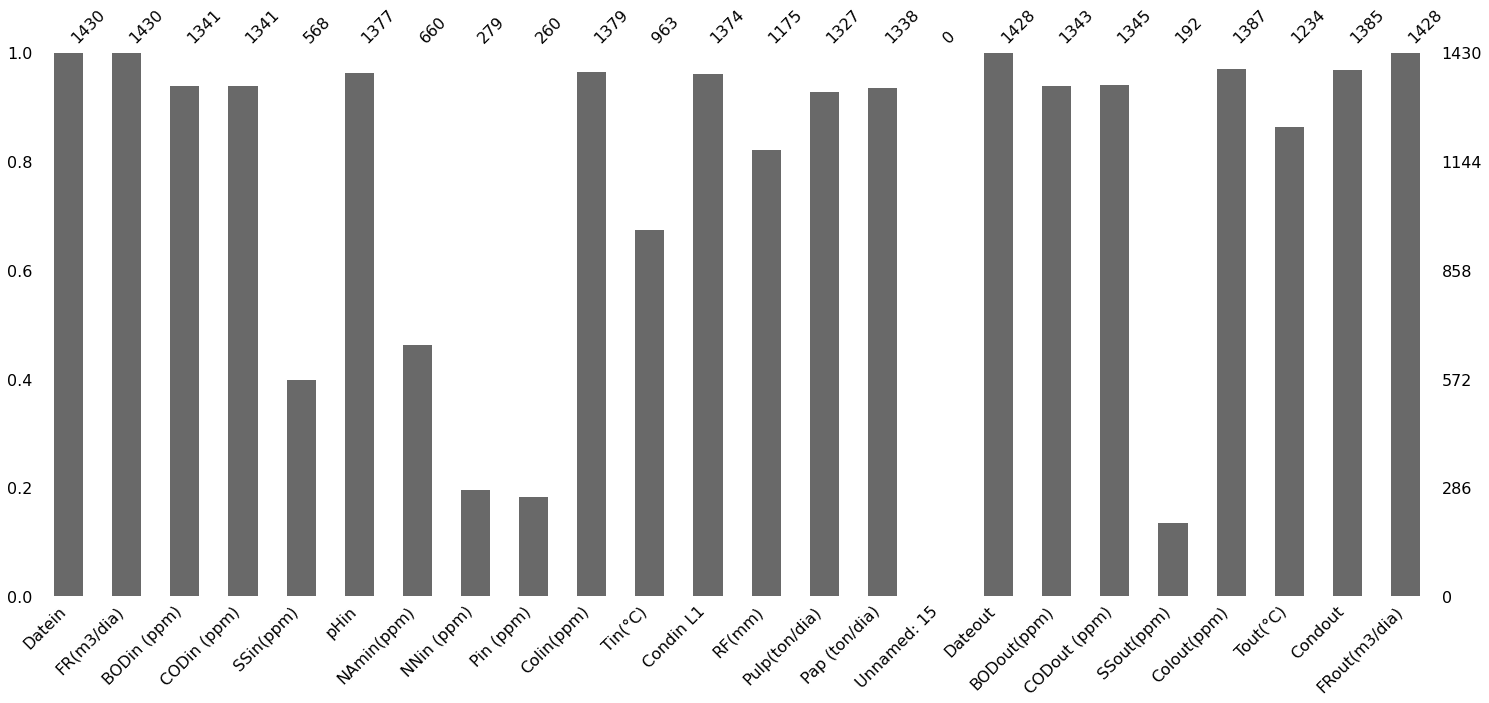

In [4]:
fig = missingno.bar(df)
fig_copy = fig.get_figure()
fig_copy.savefig('grafico_barra_nan.png', bbox_inches = 'tight')

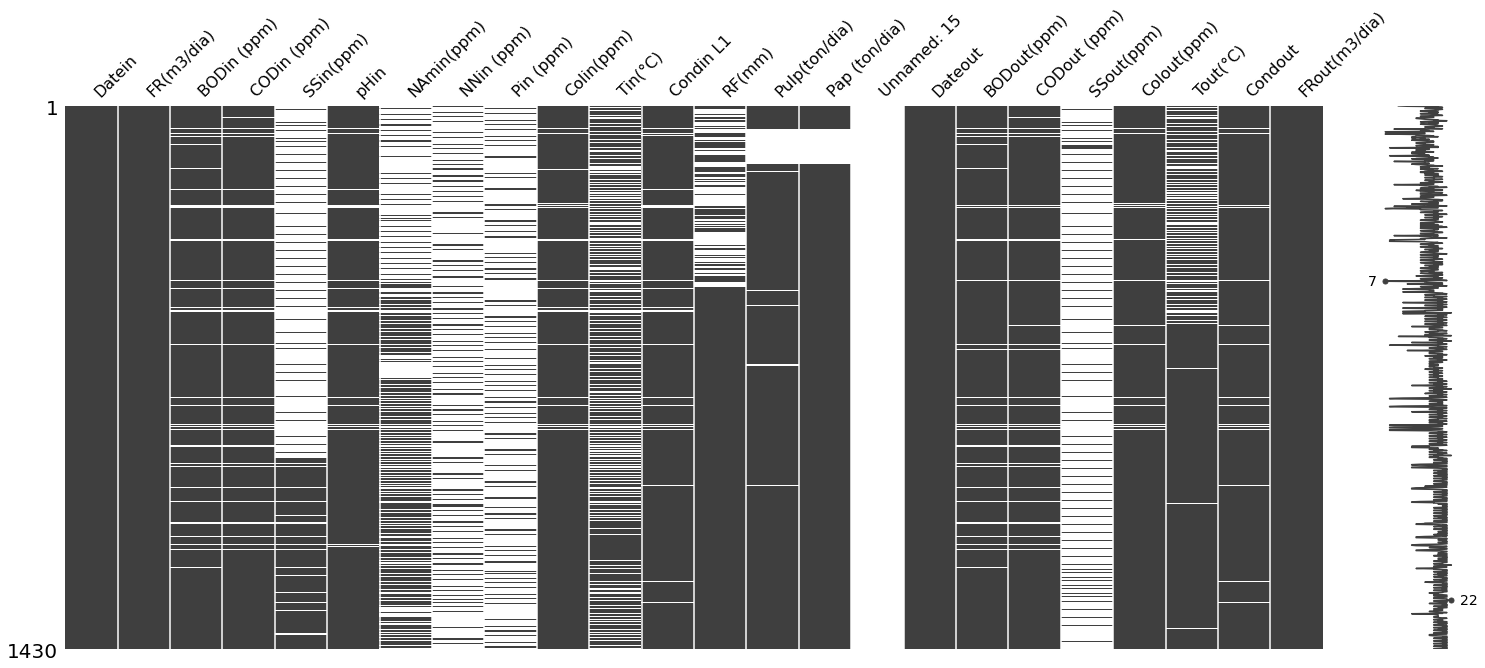

In [5]:
fig = missingno.matrix(df)
fig_copy = fig.get_figure()
fig_copy.savefig('grafico_matrix_nan.png', bbox_inches = 'tight')

In [6]:
df.isna().sum()

Datein              0
FR(m3/dia)          0
BODin (ppm)        89
CODin (ppm)        89
SSin(ppm)         862
pHin               53
NAmin(ppm)        770
NNin (ppm)       1151
Pin (ppm)        1170
Colin(ppm)         51
Tin(°C)           467
Condin L1          56
RF(mm)            255
Pulp(ton/dia)     103
Pap (ton/dia)      92
Unnamed: 15      1430
Dateout             2
BODout(ppm)        87
CODout (ppm)       85
SSout(ppm)       1238
Colout(ppm)        43
Tout(°C)          196
Condout            45
FRout(m3/dia)       2
dtype: int64

As variáveis **SSin, NAmin, NNin, Pin, Tin e SSout** possuem muitos valores faltantes dentro do banco de dados e isso pode atrapalhar na modelagem dos dados, por isso seram excluidas do banco de dados.

In [7]:
df.drop(["Datein","Unnamed: 15", 'SSin(ppm)', 'NAmin(ppm)', 'NNin (ppm)', 'Pin (ppm)', 'Tin(°C)', 'SSout(ppm)'], axis=1, inplace=True)

### Preenchendo os valores faltantes do banco de dados a partir de interpolação

In [8]:
df.interpolate(method='pad', limit=15, axis = 0, inplace = True)

As variáveis **Pulp e Pap**, possuem muitos valores faltantes consecultivos e por isso não foram preencidas com a interpoção. Para esse caso será utilizado a função .fillna() para preencher estas lacunas.

In [9]:
df.fillna(0,axis=1, inplace = True)

<AxesSubplot:>

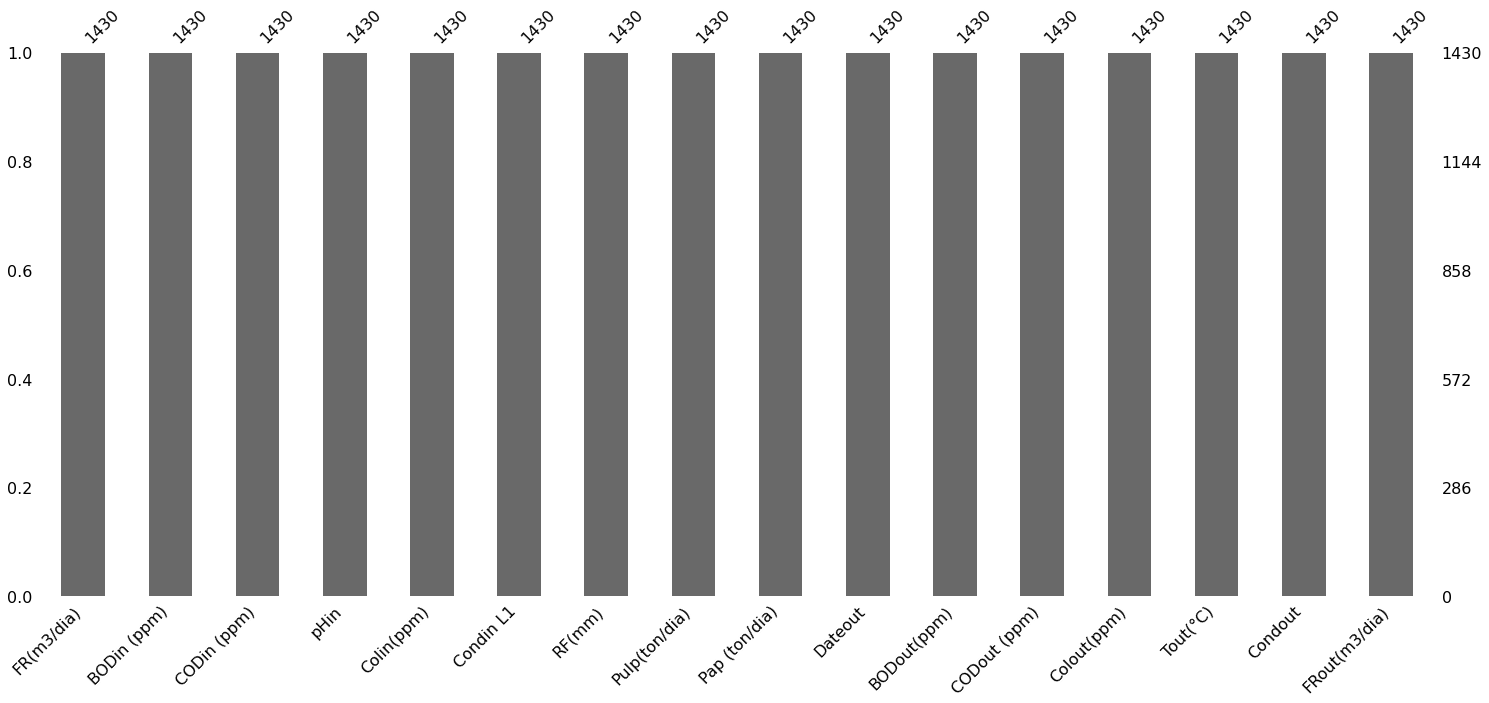

In [10]:
missingno.bar(df)

In [11]:
df['BODin (ppm)']= df['BODin (ppm)'].astype(float)
df['CODin (ppm)']= df['CODin (ppm)'].astype(int)
df['Colin(ppm)']= df['Colin(ppm)'].astype(int)
df['Condin L1']= df['Condin L1'].astype(int)
df['pHin']= df['pHin'].astype(float)
df['RF(mm)']= df['RF(mm)'].astype(float)
df['Pulp(ton/dia)']= df['Pulp(ton/dia)'].astype(float)
df['Pap (ton/dia)']= df['Pap (ton/dia)'].astype(float)
df['BODout(ppm)']= df['BODout(ppm)'].astype(float)
df['CODout (ppm)']= df['CODout (ppm)'].astype(int)
df['Tout(°C)']= df['Tout(°C)'].astype(float)
df['Condout']= df['Condout'].astype(int)
df['Colout(ppm)']= df['Colout(ppm)'].astype(int)
df['FRout(m3/dia)']= df['FRout(m3/dia)'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FR(m3/dia)     1430 non-null   object 
 1   BODin (ppm)    1430 non-null   float64
 2   CODin (ppm)    1430 non-null   int32  
 3   pHin           1430 non-null   float64
 4   Colin(ppm)     1430 non-null   int32  
 5   Condin L1      1430 non-null   int32  
 6   RF(mm)         1430 non-null   float64
 7   Pulp(ton/dia)  1430 non-null   float64
 8   Pap (ton/dia)  1430 non-null   float64
 9   Dateout        1430 non-null   object 
 10  BODout(ppm)    1430 non-null   float64
 11  CODout (ppm)   1430 non-null   int32  
 12  Colout(ppm)    1430 non-null   int32  
 13  Tout(°C)       1430 non-null   float64
 14  Condout        1430 non-null   int32  
 15  FRout(m3/dia)  1430 non-null   int32  
dtypes: float64(7), int32(7), object(2)
memory usage: 139.8+ KB


### <span style='color:red'> Resposta Questão 3: A informação da série temporal é importante para os seus modelos? Como você lidaria com os valores faltantes? <span> 
    
<b>Sim, é importante pois o processo é fortemente dependente do tempo de residência do efluente dentro da lagoa.
Para os valores faltantes, algumas variáveis do banco foram expluidas pois exestiam muitos valores faltantes. Para as demais variáveis com menos valores faltantes a estratégia utilizada foi a interpolação de valores e preenchimento dos demais valores com 0's.

## Análise de dados

### Análise de outliers utilizando boxplot

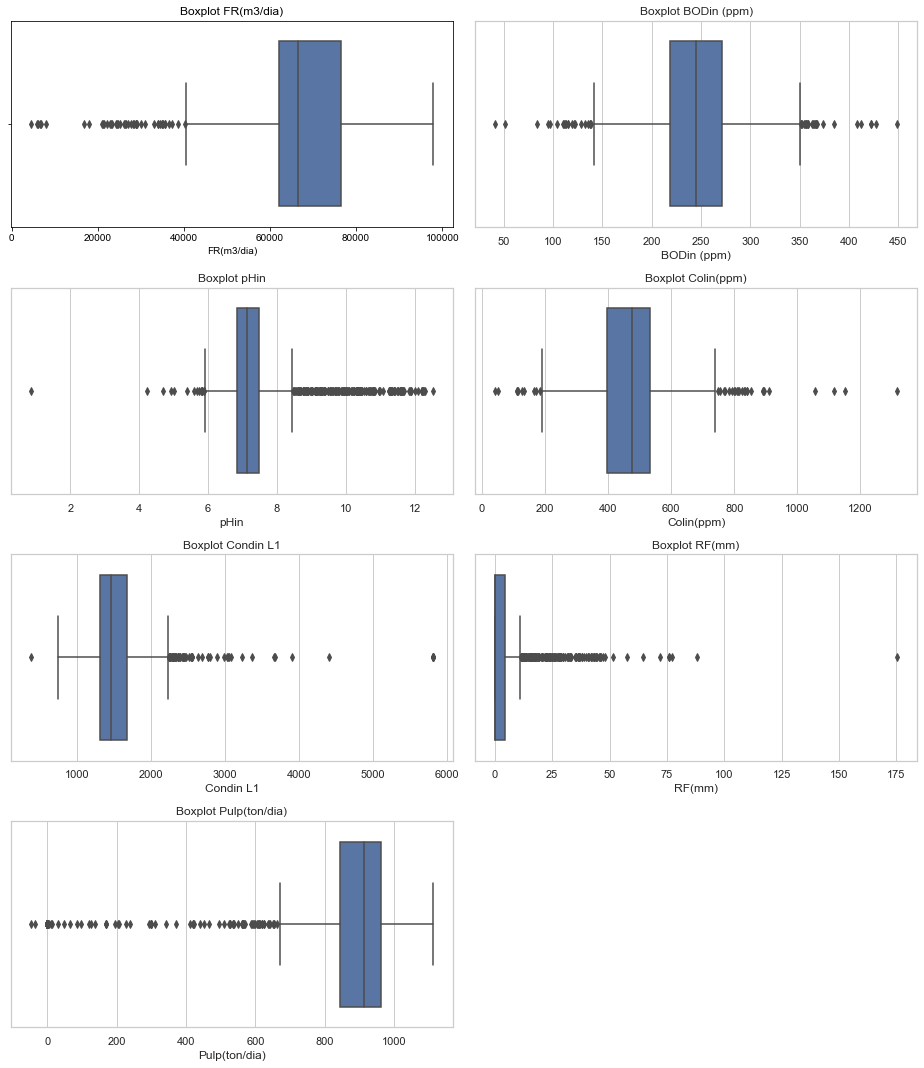

In [12]:
df_1 = df[['FR(m3/dia)', 'BODin (ppm)', 'pHin', 'Colin(ppm)', 'Condin L1', 
          'RF(mm)', 'Pulp(ton/dia)']]

plt.figure(figsize=(13,15))

for i,cat in enumerate(df_1):
    plt.subplot(4,2,i+1)
    sns.set_theme(style="whitegrid")
    sns.boxplot(x=cat, data=df)
    plt.title("Boxplot {}".format(cat))
plt.tight_layout()
plt.show()

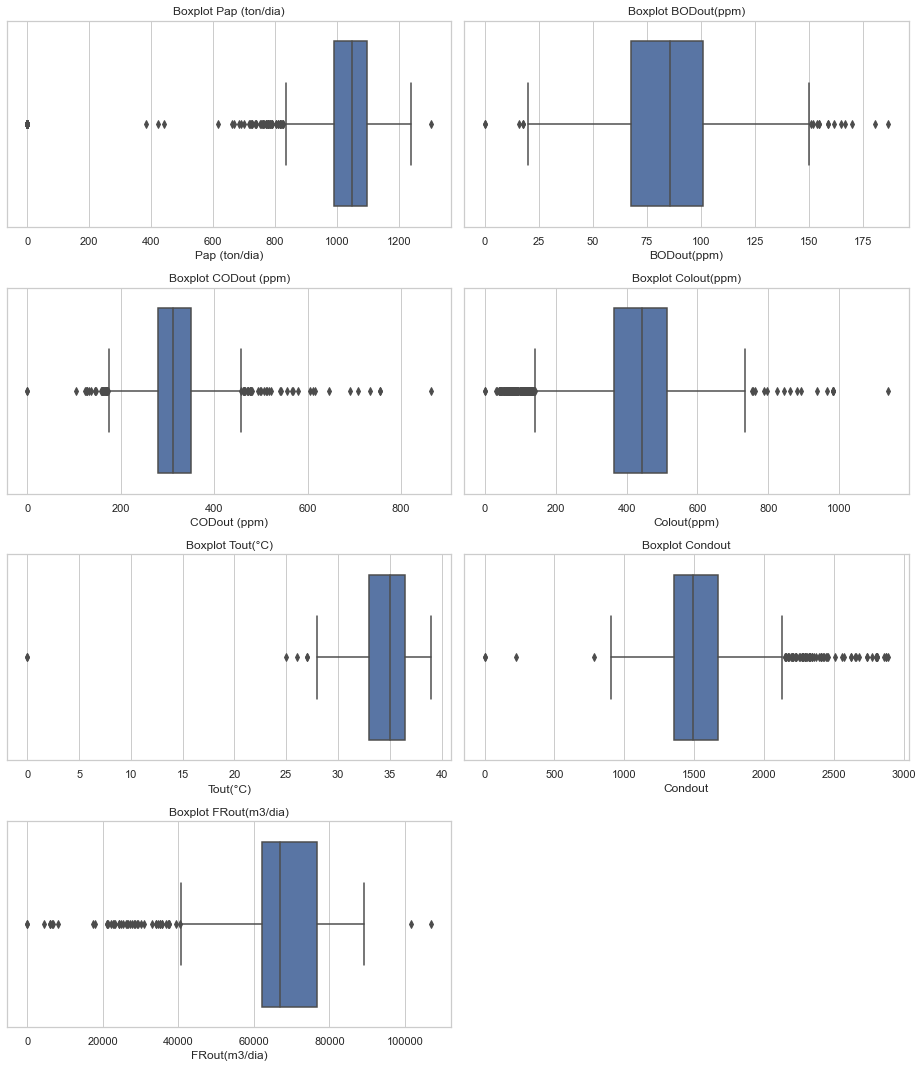

In [13]:
df_2 = df[['Pap (ton/dia)', 'BODout(ppm)', 'CODout (ppm)', 'Colout(ppm)',
          'Tout(°C)', 'Condout', 'FRout(m3/dia)']]
plt.figure(figsize=(13,15))

for i,cat in enumerate(df_2):
    plt.subplot(4,2,i+1)
    sns.set_theme(style="whitegrid")
    sns.boxplot(x=cat, data=df)
    plt.title("Boxplot {}".format(cat))
plt.tight_layout()
plt.show()

### Tratamento dos outliers dos dados utilizando Z-scores

Z-score é o número de desvios padrões em relação à média de um ponto de informação. A partir de uma curva de dispersão comum, a pontuação Z estende-se de (forma padrão) de -3 desvios padrão até +3 desvios padrão.


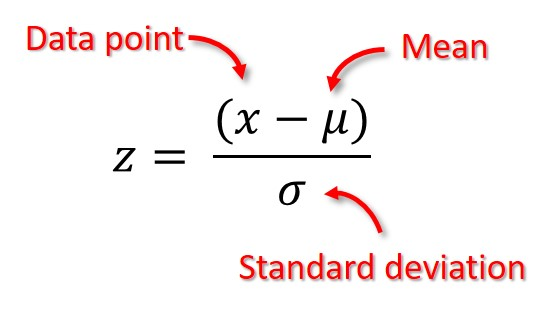
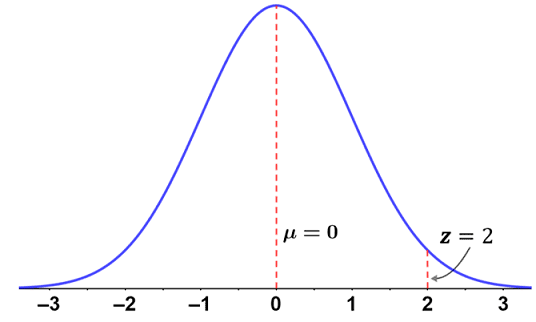

In [14]:
from scipy import stats
df_3 = df[['CODin (ppm)', 'Colin(ppm)', 'Condin L1', 
          'CODout (ppm)', 'Condout', 'FRout(m3/dia)']]

z_scores= stats.zscore(df_3)
z_scores

CODin (ppm)  Colin(ppm)  Condin L1  CODout (ppm)   Condout  \
0       -0.949797   -0.892637  -0.811815     -4.233042 -5.003967   
1       -0.775702   -0.266625  -0.701372     -4.233042 -5.003967   
2        0.075428   -1.453609  -1.143145     -0.945449 -1.166377   
3       -0.988484   -0.486136  -0.878081     -1.052799 -1.327621   
4       -0.891765   -0.486136  -0.745549     -1.267499 -1.408242   
...           ...         ...        ...           ...       ...   
1425     1.816374   -0.803207   1.330784      2.154281  2.187483   
1426     1.816374   -1.152798   1.352873      2.181119  2.703461   
1427     1.332778   -0.990198   1.507494      1.751719  2.542218   
1428     1.352122   -1.323529   1.640026      1.282063  2.316477   
1429     1.216715   -1.152798   0.981784      1.818812  1.352242   

      FRout(m3/dia)  
0         -5.664839  
1         -5.664839  
2          1.386325  
3          1.004408  
4          1.362596  
...             ...  
1425      -1.286422  
1426      -1.202911  
1427      -1.341676  
1428      -1.333878  
1429      -1.333207  

[1430 rows x 6 columns]

In [15]:
# Aplicaremos eliminação dos dados que obtiverem valores de z_scores > 2
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 2).all(axis=1)
df = df[filtered_entries].reset_index(drop=True)
df

FR(m3/dia)  BODin (ppm)  CODin (ppm)  pHin  Colin(ppm)  Condin L1  \
0         82039        292.0          571  5.39         287       1030   
1         79501        264.0          461  5.92         406       1150   
2         82461        299.0          471  6.11         406       1210   
3         79129        247.0          391  6.17         318       1075   
4         78475        255.0          472  6.63         318       1216   
...         ...          ...          ...   ...         ...        ...   
1202      57697        322.0          639  7.27         322       1884   
1203      56570        351.0          749  7.20         351       2140   
1204      57096        357.0          712  7.28         357       1955   
1205      53069        374.0          736  7.33         374       2080   
1206      51662        324.0          689  7.28         324       1992   

      RF(mm)  Pulp(ton/dia)  Pap (ton/dia)    Dateout  BODout(ppm)  \
0       39.7        972.600         1065.0   9/3/1996         74.0   
1        0.8        744.481          879.7   9/4/1996         88.0   
2       26.1        891.033          985.8   9/5/1996         67.0   
3        3.0        848.071         1064.2   9/7/1996         46.0   
4       46.2        964.139         1077.1   9/8/1996         53.0   
...      ...            ...            ...        ...          ...   
1202     0.0        934.862         1139.3   7/7/2000        130.0   
1203     0.0        999.338         1054.9   7/8/2000        120.0   
1204     0.0        953.757          979.1  7/13/2000        150.0   
1205     0.2        986.222          982.5  7/19/2000        122.0   
1206     0.0       1045.322          937.2  7/31/2000        147.0   

      CODout (ppm)  Colout(ppm)  Tout(°C)  Condout  FRout(m3/dia)  
0              245          311      33.5     1190          84097  
1              237          298      33.0     1140          79542  
2              221          297      33.0     1115          83814  
3              187          306      33.0     1160          79285  
4              232          300      33.0     1200          80870  
...            ...          ...       ...      ...            ...  
1202           416          130      32.0     2010          57697  
1203           408          120      31.0     2120          56570  
1204           421          150      30.0     2010          57096  
1205           425          122      28.0     2130          53079  
1206           451          147      32.0     1971          51662  

[1207 rows x 16 columns]

#### Bloxplot após a aplicação do Z-scores e eliminação dos dados discrepantes

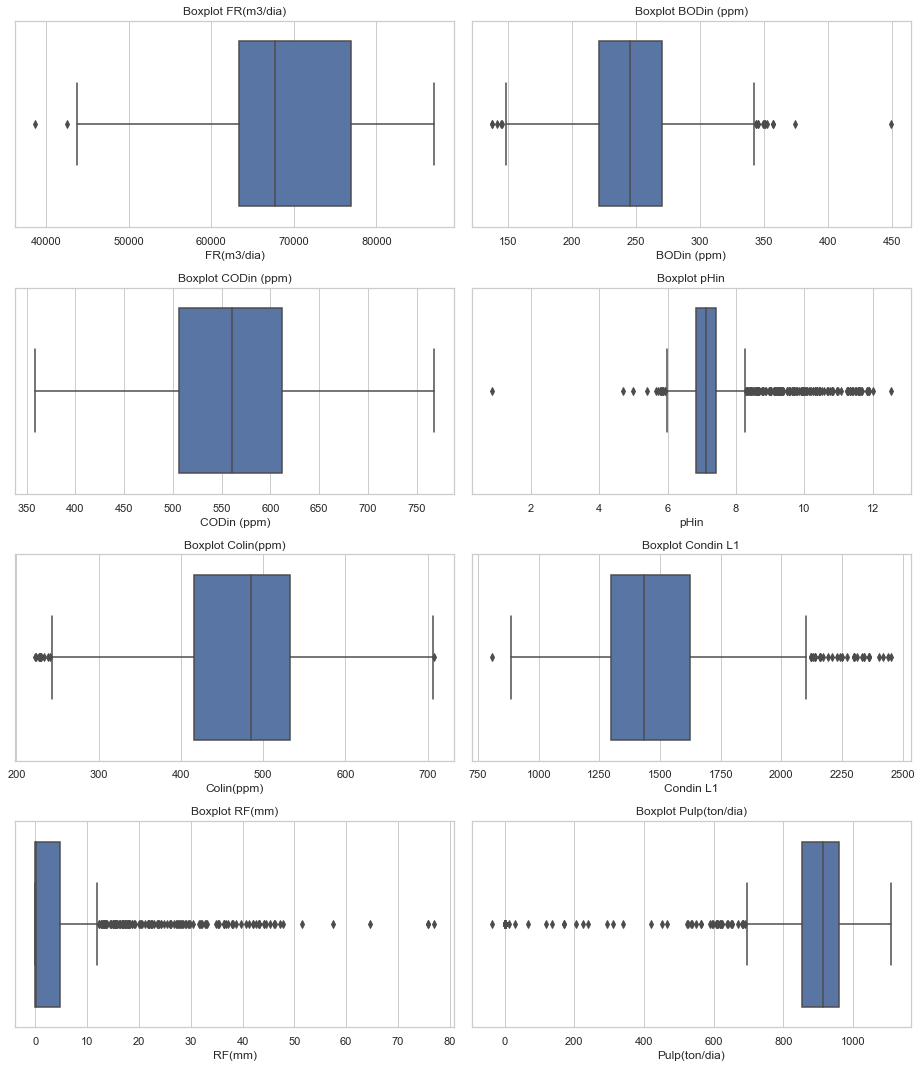

In [16]:
df_1 = df[['FR(m3/dia)', 'BODin (ppm)', 'CODin (ppm)', 'pHin', 'Colin(ppm)', 'Condin L1', 
          'RF(mm)', 'Pulp(ton/dia)']]

plt.figure(figsize=(13,15))

for i,cat in enumerate(df_1):
    plt.subplot(4,2,i+1)
    sns.set_theme(style="whitegrid")
    sns.boxplot(x=cat, data=df)
    plt.title("Boxplot {}".format(cat))
plt.tight_layout()
plt.show()

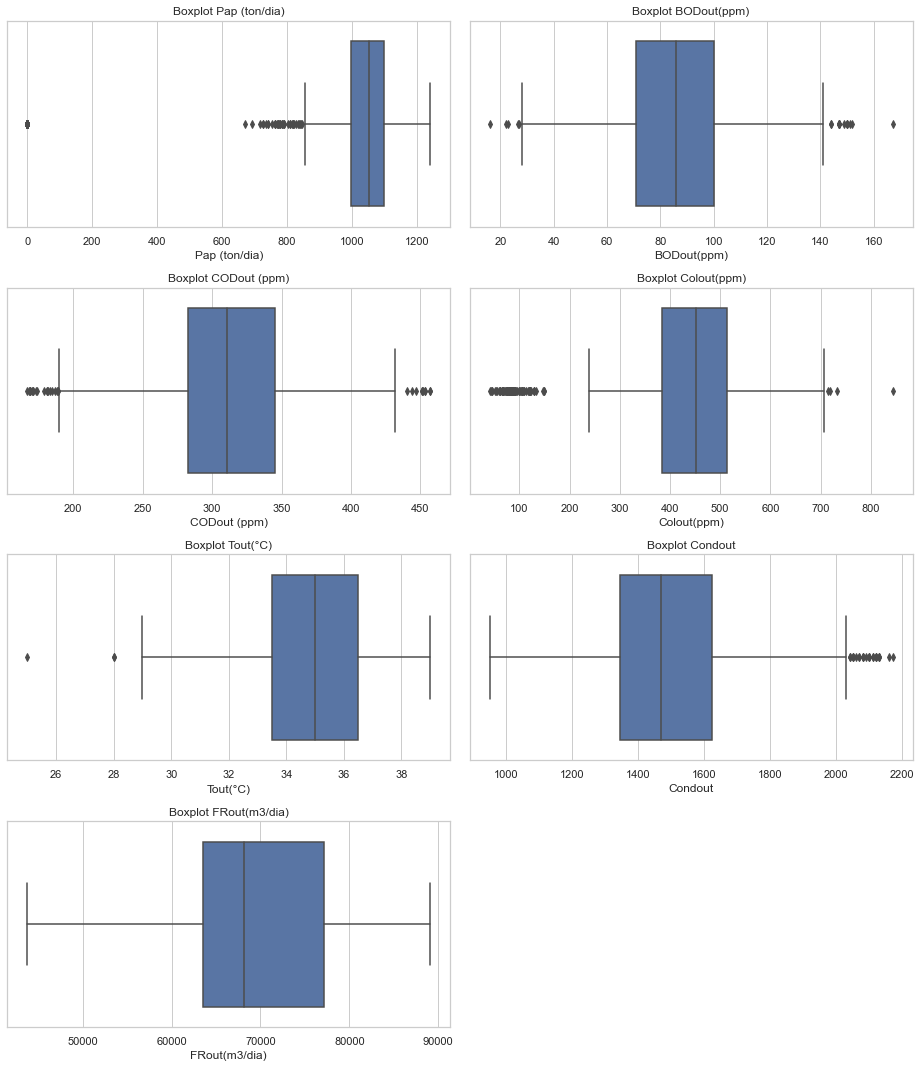

In [17]:
df_2 = df[['Pap (ton/dia)', 'BODout(ppm)', 'CODout (ppm)', 'Colout(ppm)',
          'Tout(°C)', 'Condout', 'FRout(m3/dia)']]
plt.figure(figsize=(13,15))

for i,cat in enumerate(df_2):
    plt.subplot(4,2,i+1)
    sns.set_theme(style="whitegrid")
    sns.boxplot(x=cat, data=df)
    plt.title("Boxplot {}".format(cat))
plt.tight_layout()
plt.show()

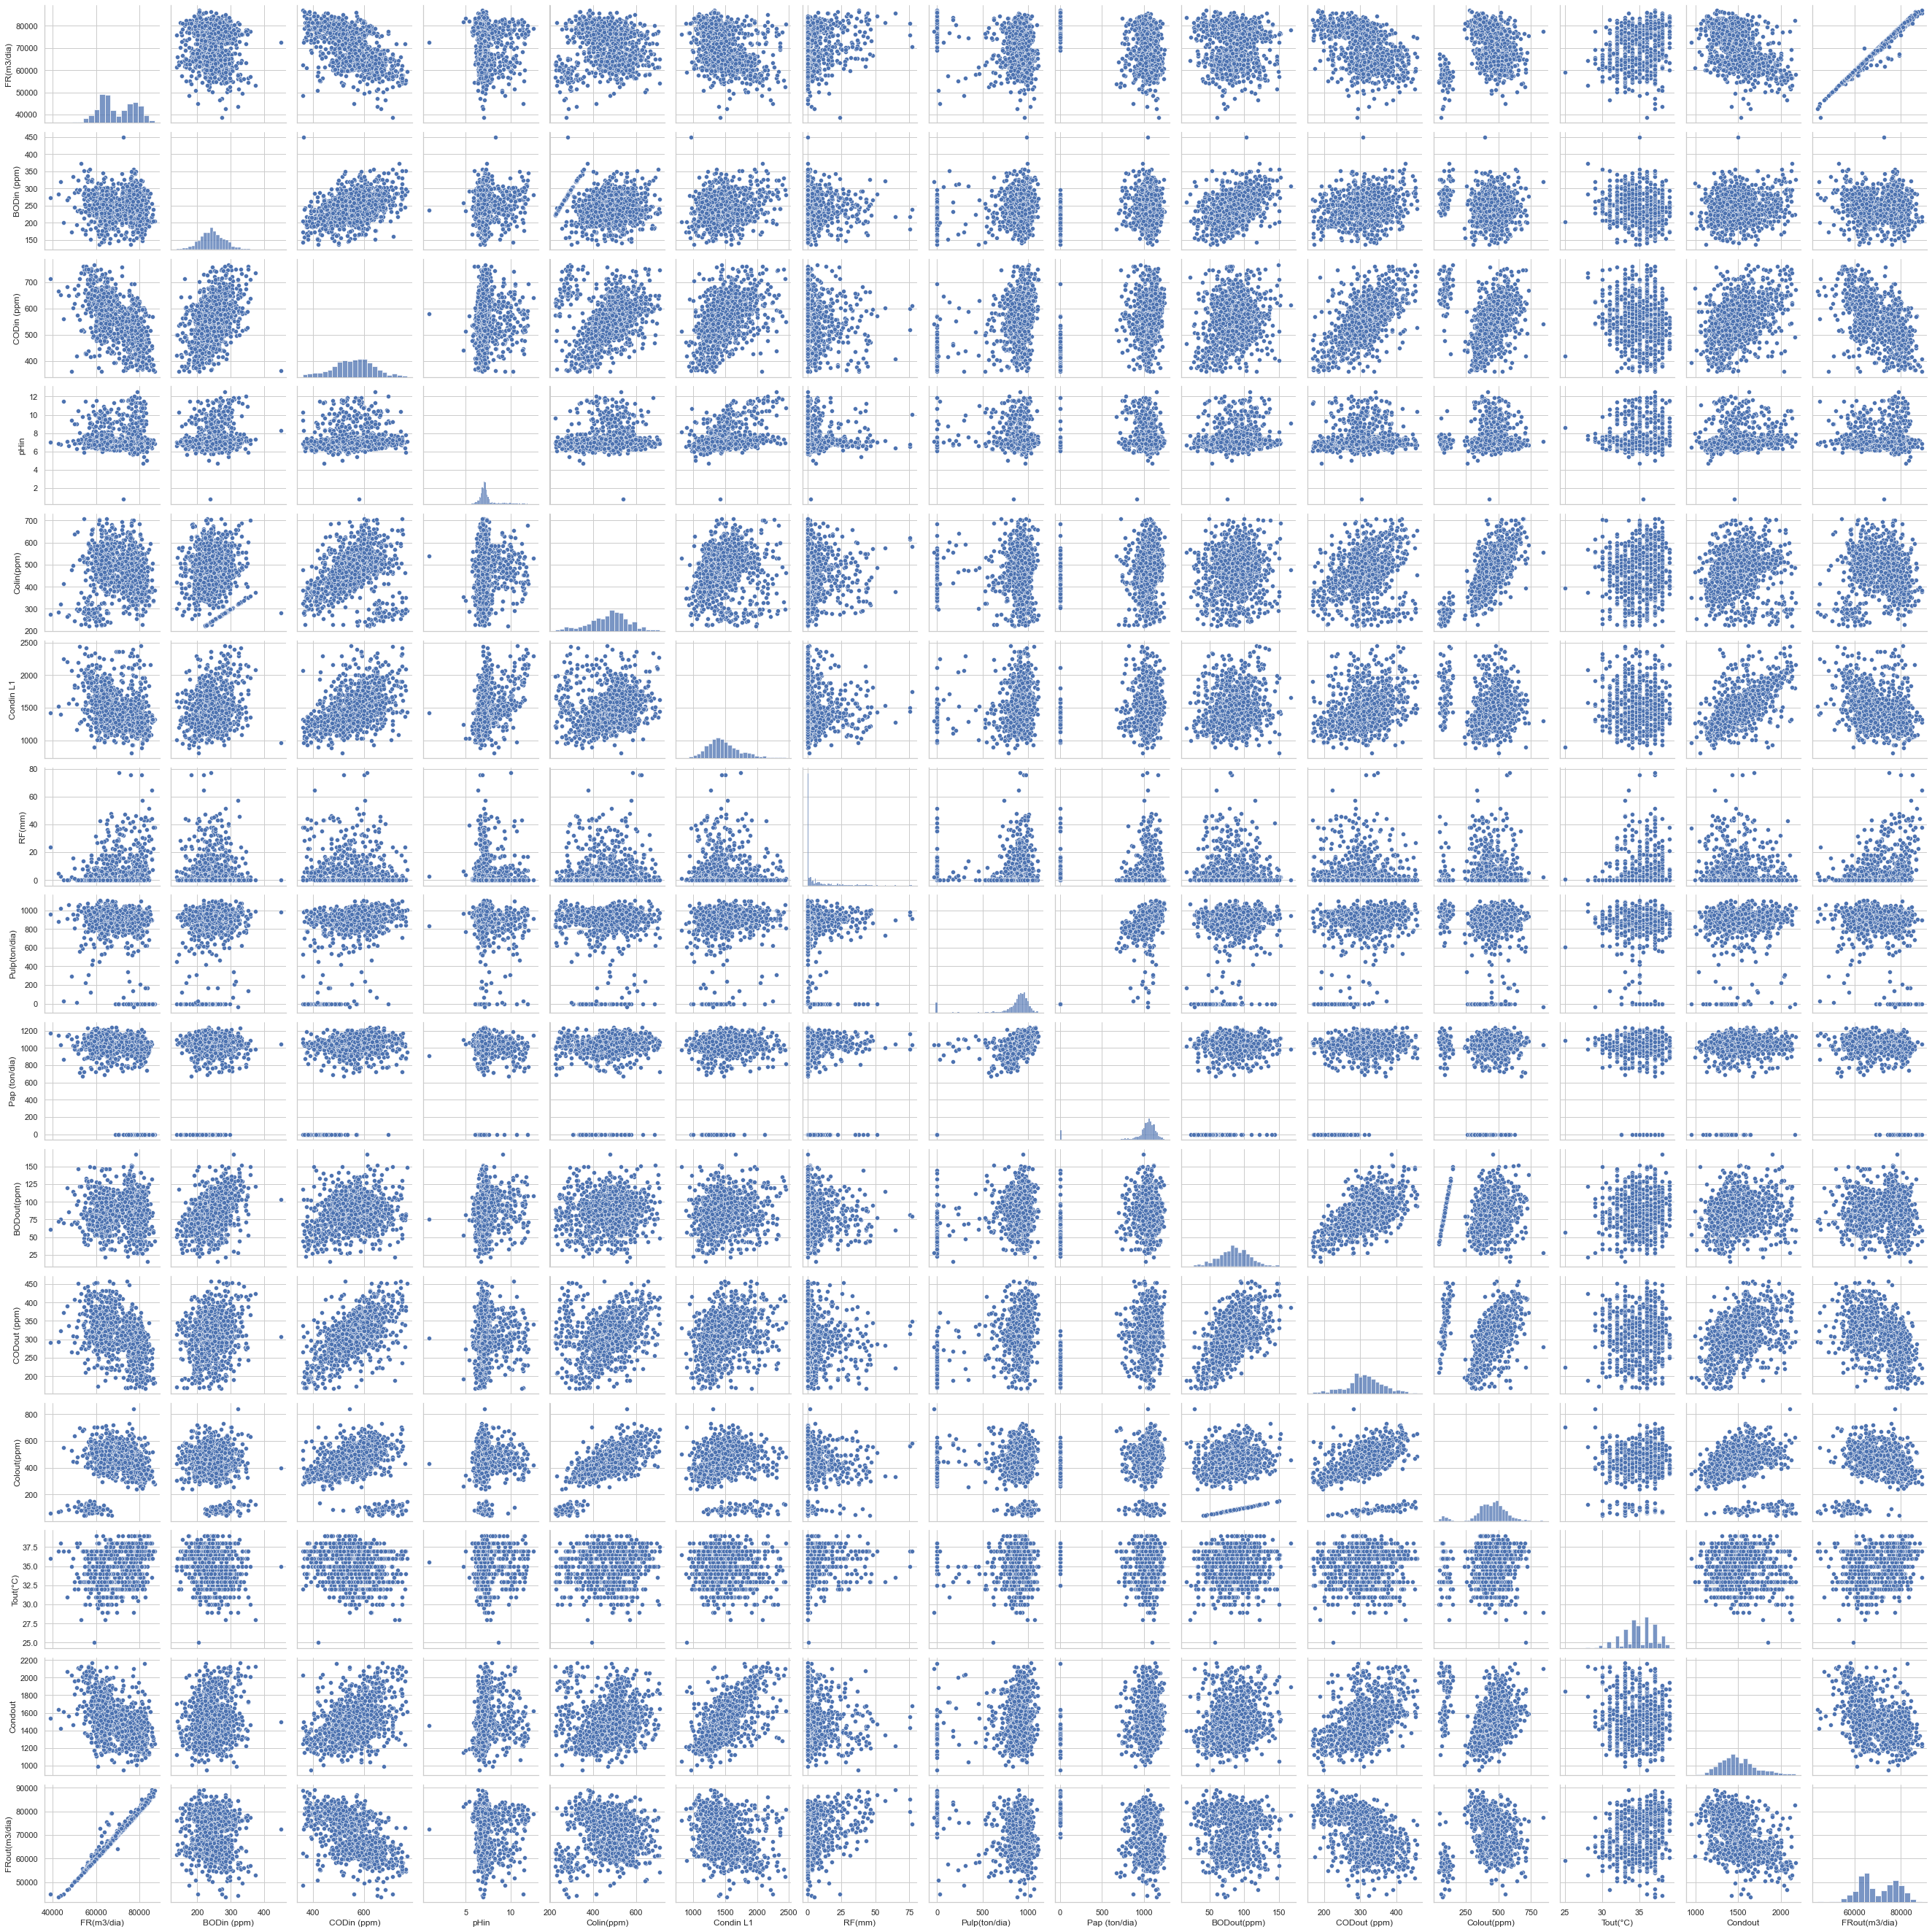

In [18]:
figsize=(20, 15)
scater = sns.pairplot(df.iloc[:,:], diag_kind =  'hist')

Percebe-se uma **relação linear** entre as **variávies FR(m³/dia) vs. FRout(m³/dia)** e as variáveis **BODin(ppm) vs. CODin (ppm)**.

Além disso, percebe-se também uma **grande presença de <i>outliers</i>** em algumas variáveis, esses <i>outliers</i> serão tratados na próxima etapa do tratamento dos dados pois estes podem influenciar na qualidade dos modelos produzidos.

### <span style='color:red'> Resposta Questão 2: É possível propor um ou mais modelos de classificação/agrupamento das variáveis considerando diferentes comportamentos observados nos dados? <span>
<b>Sim, é possível propor mais de uma estratégia de modelagem, do processo. Podemos por exemplo, propôr uma estratégia de predição de DQO de saída do processo incluindo todas as variáveis do processo menos a DBO de entrada. Após predizer a DQO de saída é possível construir um outro modelo para predizer a DBO de saída, já que essas duas variáiveis relação.
Outra estratégia de modelagem dos dados é predizer em um primeiro modelo a DBO de saída e através deste criar um segundo modelo para predizer a DQO de saída.
Além dessas duas estratégias ainda é possível criar modelos para predizer outras variáveis na saída do processo que são importantes e represetam a qualidade do processo, como a cor e os sólidos em suspensão.

## Divisão do banco de dados em treinamento/teste

In [19]:
from sklearn.model_selection import train_test_split
X = df.drop(['pHin', 'Colin(ppm)', 'Dateout', 'BODout(ppm)', 'CODout (ppm)', 'Colout(ppm)'],
            axis=1, inplace=False).values

y = df['CODout (ppm)'].values.reshape(-1, 1)

In [20]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X= sc_X.fit_transform(X)
y= sc_y.fit_transform(y)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .35, random_state = 0)

In [22]:
print(X)

[[ 1.51184489  1.22839237  0.15941786 ... -0.69206455 -1.42774552
   1.71632171]
 [ 1.20470161  0.49130046 -1.22045757 ... -0.93113779 -1.65685326
   1.16838203]
 [ 1.56291442  1.41266535 -1.09501435 ... -0.93113779 -1.77140713
   1.68227848]
 ...
 [-1.50670309  2.9394986   1.92816727 ... -2.36557726  2.3296214
  -1.53173962]
 [-1.99404193  3.38701869  2.229231   ... -3.32187023  2.87947997
  -2.01496107]
 [-2.16431403  2.07078313  1.63964786 ... -1.40928428  2.15091736
  -2.18541782]]


In [23]:
X.shape

(1207, 10)

In [24]:
print(y)

[[-1.24429596]
 [-1.39430809]
 [-1.69433236]
 ...
 [ 2.05597097]
 [ 2.13097704]
 [ 2.61851647]]


### boxplot variáveis utilizadas na modelagem

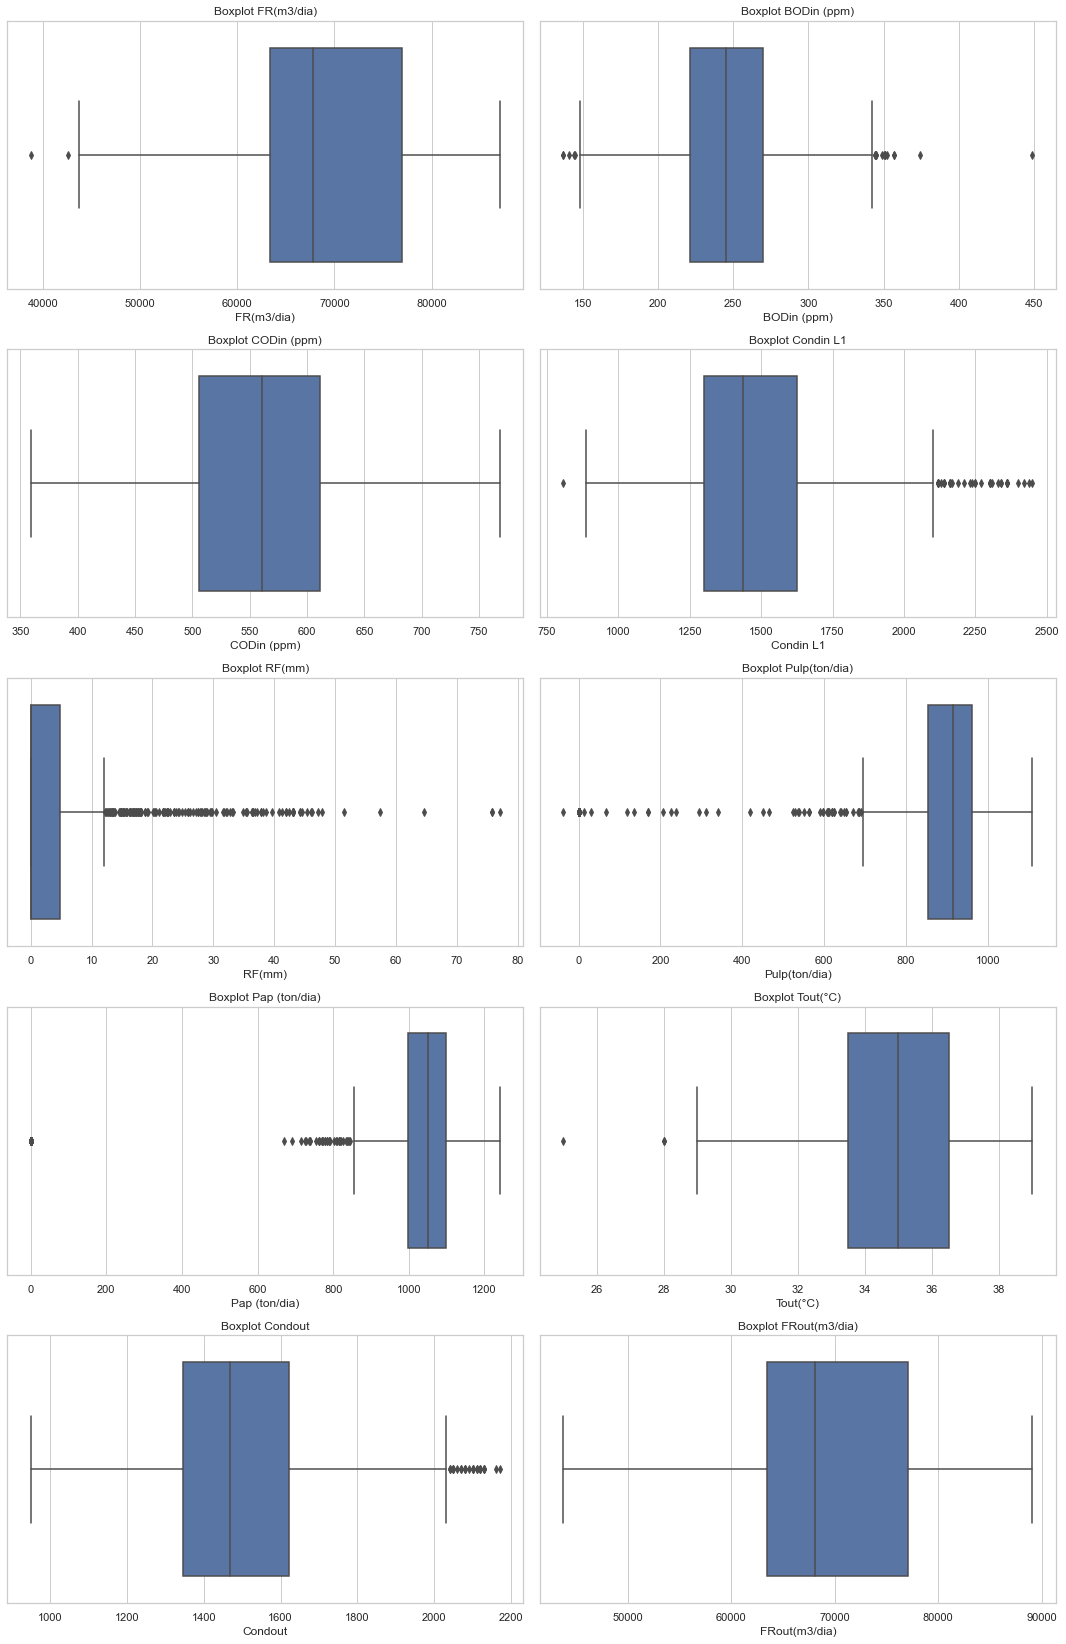

In [25]:
fig = plt.figure(figsize=(15,23))
df__ = df.drop(['pHin', 'Colin(ppm)', 'Dateout', 'BODout(ppm)', 'CODout (ppm)', 'Colout(ppm)'],
            axis=1, inplace=False)

for i,cat in enumerate(df__):
    plt.subplot(5,2,i+1)
    sns.set_theme(style="whitegrid")
    sns.boxplot(x=cat, data=df)
    plt.title("Boxplot {}".format(cat))
plt.tight_layout()
plt.show()

fig.savefig('boxplot.png', format = 'png')

<Figure size 720x1080 with 0 Axes>

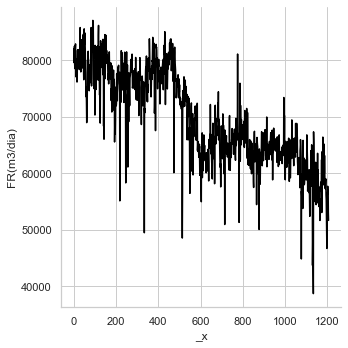

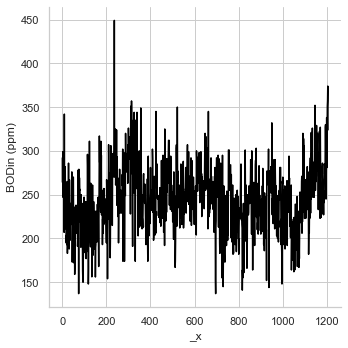

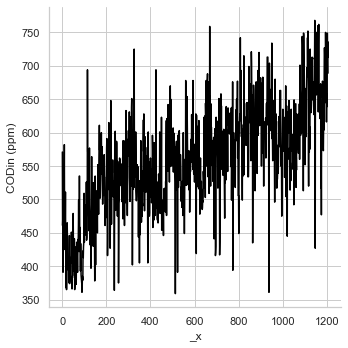

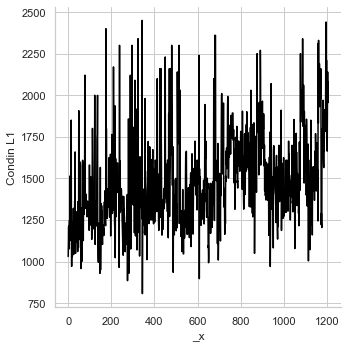

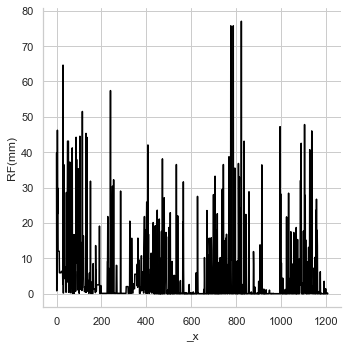

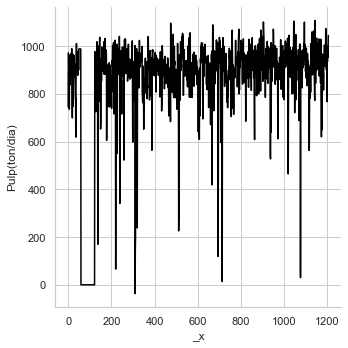

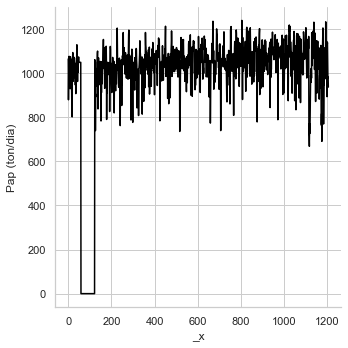

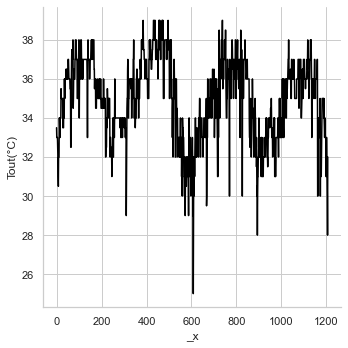

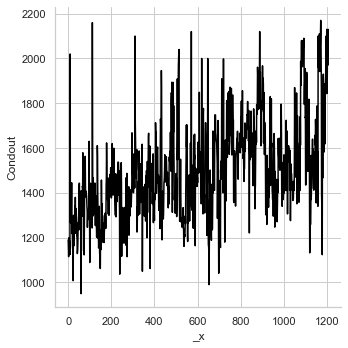

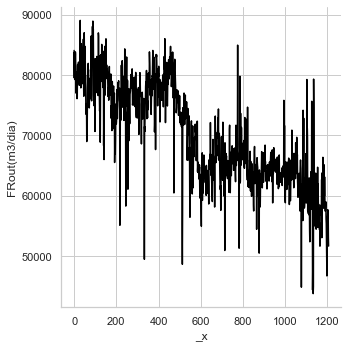

In [26]:
fig = plt.figure(figsize=(10,15))

for i,cat in enumerate(df__):
    #plt.subplot(5,2,i+1)
    #ax = axs[0, 0]
    sns.set_theme(style="whitegrid")
    sns.relplot(data=df, x = df.index, y= df[cat], kind="line", color = 'black')
    #plt.title("{}".format(cat))
    #ax.set_xlabel('Amostras')
    #plt.tight_layout()
    plt.show()

fig.savefig('Temporal.png', format = 'png')

## Treinando o modelo Linear

In [27]:
from sklearn.linear_model import LinearRegression
modelo =  LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

## Fazendo predições com o modelo utilizando os dados de teste

In [28]:
y_pred = modelo.predict(X_test)
np.set_printoptions(precision=2)

print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[-0.06  0.84]
 [-1.09 -1.73]
 [-0.38 -0.4 ]
 [-0.35 -0.38]
 [-0.62 -1.79]
 [ 1.03  2.54]
 [ 0.17  1.12]
 [ 1.25  0.84]
 [-0.61 -1.73]
 [-0.65 -1.02]
 [ 0.38 -0.06]
 [-0.52 -0.33]
 [ 0.61  0.89]
 [ 0.75 -0.48]
 [ 0.53  1.06]
 [ 1.49  0.22]
 [ 0.16 -0.46]
 [-1.32 -0.31]
 [ 0.02  0.91]
 [-0.25 -0.44]
 [ 0.35  0.65]
 [ 0.53  0.35]
 [-0.26  0.26]
 [ 0.74  1.68]
 [-0.21 -1.53]
 [ 0.14 -0.14]
 [-0.43  0.67]
 [-0.49 -1.51]
 [-0.41 -1.62]
 [ 0.45  1.61]
 [-0.16 -0.49]
 [ 0.02  1.21]
 [-0.33  0.35]
 [-0.45 -1.  ]
 [-0.7  -1.81]
 [-0.15 -0.04]
 [ 0.19  1.46]
 [-0.3  -0.57]
 [-1.39 -2.26]
 [ 0.39  0.01]
 [ 1.28  0.97]
 [-0.05  0.8 ]
 [ 0.24 -0.1 ]
 [-0.11  0.5 ]
 [-0.42 -0.72]
 [ 1.12 -0.4 ]
 [ 0.91  0.65]
 [ 0.59  0.22]
 [-0.06  0.69]
 [-1.19 -1.84]
 [ 0.83  1.42]
 [ 0.1  -0.79]
 [ 0.5   0.71]
 [-0.23 -0.25]
 [-0.06 -0.29]
 [-0.1  -0.44]
 [-1.03 -1.69]
 [ 0.53  1.04]
 [ 0.02  0.74]
 [ 0.14  1.85]
 [ 0.12 -0.57]
 [-0.99 -2.69]
 [ 1.71  1.91]
 [-0.68  0.44]
 [ 0.75  0.89]
 [-0.24 -0.44]
 [ 0.99  0

## Avaliando a performance do modelo LINEAR

In [29]:
from sklearn.metrics import r2_score, mean_squared_error
r2_test= r2_score(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)

y_pred_train= modelo.predict(X_train)
r2_train= r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)

print("R² obtido para os dados de treinamento: {:.2f}".format(r2_train))
print("MSE (Mean Squared Error) obtido para os dados de treinamento: {:.2f}".format(mse_train))
print("R² obtido para os dados de teste: {:.2f}".format(r2_test))
print("MSE (Mean Squared Error) obtido para os dados de teste: {:.2f}".format(mse_test))

R² obtido para os dados de treinamento: 0.47
MSE (Mean Squared Error) obtido para os dados de treinamento: 0.54
R² obtido para os dados de teste: 0.42
MSE (Mean Squared Error) obtido para os dados de teste: 0.57


### Aplicando a validação cruzada (k-fold)

In [30]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator = modelo, X= X_train, y = y_train, scoring="r2", cv= 4)
print("{:.2f}% de acurácia com desvio padrão de {:.2f}%".format(scores.mean()*100, scores.std()*100))

44.07% de acurácia com desvio padrão de 4.58%



### Realizando teste estatísticos no modelo LINEAR (p-valor e estatística F)

In [31]:
from sklearn.feature_selection import f_regression

y = df['CODout (ppm)'].values

modelo.fit(X,y)
params = np.append(modelo.intercept_,modelo.coef_)
predictions = modelo.predict(X)

newX = np.append(np.ones((len(X),1)), X, axis=1)
newX = np.float64(newX)
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b
f_test = f_regression(X, y)
f_test /= np.max(f_test)

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coeficientes"],myDF3["Erro padrão"],myDF3["Teste t"],myDF3["p- valor"],  = [params,sd_b,ts_b,p_values]
print(myDF3)

    Coeficientes  Erro padrão  Teste t  p- valor
0       311.3571        1.136  274.068     0.000
1        35.5719       12.461    2.855     0.004
2         0.5471        1.322    0.414     0.679
3        24.4465        1.714   14.262     0.000
4        -5.4341        1.550   -3.507     0.000
5        -1.0828        1.558   -0.695     0.487
6         0.6943        2.468    0.281     0.779
7         6.6207        2.463    2.688     0.007
8         7.3837        1.235    5.977     0.000
9        14.0176        1.606    8.726     0.000
10      -40.4673       12.638   -3.202     0.001


#### Teste estatístico de p- valor:
- **Hipótese nula (H0)**: coeficiente do modelo (X) **NÃO** possui relação com a resposta (Y)
- **Hipótese alternativa (Ha)**: coeficiente do modelo (X) possui relação com a resposta (Y)

Para o caso em estudo, **utilizaremos o valor de 5%, como valor de corte para o p-valor.** Ou seja, **p-valores MENORES que 5%, rejeitaremos H0 e aceitaremos Ha.**

Para o modelo LINEAR proposto: as variáveis 2, 5 e 6 possuem p-valores **ACIMA** do valor de corte. Logo, essas variáveis podem ser selecionadas a deixarem o modelo.

As variáveis eliminadas serão, respectivamente: **Demana Bioquímica de Oxigênio na entrada, Precipitação e Produção de Polpa.**

Essas variáveis serão selecionadas utilizando o **método para trás <i>(Backward selection)</i>** para deixarem ou não o modelo baseados no **p-valor**.

### <i>Backward selection</i>

Todas as variáveis presentes no modelo

In [57]:
X_opt = X[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
X_opt = X_opt.astype(np.float64)
modelo_opt = modelo.fit(X_opt, y)
params = modelo_opt.coef_
predictions= modelo_opt.predict(X_opt)
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))
var_b = MSE*(np.linalg.inv(np.dot(X_opt.T,X_opt)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b
p_values =[2*(1-stats.t.cdf(np.abs(i),(len(X_opt)-len(X_opt[0])))) for i in ts_b]
p_values = np.round(p_values,3)
myDF3 = pd.DataFrame()
myDF3["Coeficientes"], myDF3["p- valor"], myDF3["MSE"] = [params,p_values, MSE]
print(myDF3)

   Coeficientes  p- valor          MSE
0     35.571862     0.004  1557.786732
1      0.547121     0.679  1557.786732
2     24.446534     0.000  1557.786732
3     -5.434108     0.000  1557.786732
4     -1.082840     0.487  1557.786732
5      0.694290     0.779  1557.786732
6      6.620719     0.007  1557.786732
7      7.383699     0.000  1557.786732
8     14.017623     0.000  1557.786732
9    -40.467320     0.001  1557.786732


Exclusão da variável 2 (Demana Bioquímica de Oxigênio na entrada)

In [58]:
X_opt = X[:, [0, 2, 3, 4, 5, 6, 7, 8, 9]]
X_opt = X_opt.astype(np.float64)
modelo_opt = modelo.fit(X_opt, y)
params = modelo_opt.coef_
predictions= modelo_opt.predict(X_opt)
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))
var_b = MSE*(np.linalg.inv(np.dot(X_opt.T,X_opt)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b
p_values =[2*(1-stats.t.cdf(np.abs(i),(len(X_opt)-len(X_opt[0])))) for i in ts_b]
p_values = np.round(p_values,3)
myDF3 = pd.DataFrame()
myDF3["Coeficientes"], myDF3["p- valor"], myDF3["MSE"] = [params,p_values, MSE]
print(myDF3)

   Coeficientes  p- valor          MSE
0     35.628248     0.004  1558.009854
1     24.738429     0.000  1558.009854
2     -5.398736     0.001  1558.009854
3     -1.101789     0.480  1558.009854
4      0.749362     0.761  1558.009854
5      6.573144     0.008  1558.009854
6      7.271754     0.000  1558.009854
7     14.009048     0.000  1558.009854
8    -40.348372     0.001  1558.009854


Exclusão da variável 5 (Precipitação)

In [59]:
X_opt = X[:, [0, 2, 3, 5, 6, 7, 8, 9]]
X_opt = X_opt.astype(np.float64)
modelo_opt = modelo.fit(X_opt, y)
params = modelo_opt.coef_
predictions= modelo_opt.predict(X_opt)
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))
var_b = MSE*(np.linalg.inv(np.dot(X_opt.T,X_opt)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b
p_values =[2*(1-stats.t.cdf(np.abs(i),(len(X_opt)-len(X_opt[0])))) for i in ts_b]
p_values = np.round(p_values,3)
myDF3 = pd.DataFrame()
myDF3["Coeficientes"], myDF3["p- valor"], myDF3["MSE"] = [params,p_values, MSE]
print(myDF3)

   Coeficientes  p- valor          MSE
0     41.132129     0.000  1558.661592
1     24.793436     0.000  1558.661592
2     -5.423290     0.000  1558.661592
3      0.783297     0.751  1558.661592
4      6.588280     0.008  1558.661592
5      7.241175     0.000  1558.661592
6     13.988567     0.000  1558.661592
7    -46.135415     0.000  1558.661592


Exclusão da variável 6 (Produção de Polpa)

In [61]:
X_opt = X[:, [0, 2, 3, 6, 7, 8, 9]]
X_opt = X_opt.astype(np.float64)
modelo_opt = modelo.fit(X_opt, y)
params = modelo_opt.coef_
predictions= modelo_opt.predict(X_opt)
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))
var_b = MSE*(np.linalg.inv(np.dot(X_opt.T,X_opt)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b
p_values =[2*(1-stats.t.cdf(np.abs(i),(len(X_opt)-len(X_opt[0])))) for i in ts_b]
p_values = np.round(p_values,3)
myDF3 = pd.DataFrame()
myDF3["Coeficientes"], myDF3["p- valor"], myDF3["MSE"] = [params,p_values, MSE]
print(myDF3)

   Coeficientes  p- valor          MSE
0     41.177029       0.0  1558.793239
1     24.899343       0.0  1558.793239
2     -5.389792       0.0  1558.793239
3      7.264808       0.0  1558.793239
4      7.263777       0.0  1558.793239
5     13.933460       0.0  1558.793239
6    -46.127201       0.0  1558.793239


### Agora, para obtenção dos coeficientes do modelo LINEAR final...

In [62]:
print(modelo.coef_)
print(modelo.intercept_)

[ 41.18  24.9   -5.39   7.26   7.26  13.93 -46.13]
311.35708367854176


### Podemos então escrever o modelo de REGRESSÃO LINEAR MÚLTIPLA:

#### DQOsaida (ppm) = 311,36 + (41,18× Vazão na entrada) + (24,9× DQO entrada) - (5,39× Condutividade entrada) + (7,26x Produção de papel) + (7,26x Temperatura saída) + (13,93x Condutividade saída) - (46,13x Vazão na saída)

## Criando o modelo de DBO a partir dos resultados do modelo de DQO

In [65]:
X_opt = X[:, [0, 2, 3, 6, 7, 8, 9]]
X_opt = X_opt.astype(np.float64)
modelo_opt = modelo.fit(X_opt, y)
predictions= modelo_opt.predict(X_opt)
predictions

array([284.63, 250.17, 244.66, ..., 373.54, 381.59, 371.93])

In [66]:
from sklearn.model_selection import train_test_split
X2= predictions
X2= X2.reshape(-1, 1)
y2= df['BODout(ppm)'].values
       
X_train2,X_test2,y_train2,y_test2= train_test_split(X2, y2, test_size = .35, random_state = 0)

In [67]:
print(X2)

[[284.63]
 [250.17]
 [244.66]
 ...
 [373.54]
 [381.59]
 [371.93]]


In [68]:
print(y2)

[ 74.  88.  67. ... 150. 122. 147.]


In [69]:
print(y_test2)

[ 86.    62.    95.    84.    62.   118.   128.    95.    32.    73.
 112.   104.    88.    88.    64.    63.   119.    68.   105.    66.
  77.    78.   141.   106.    75.    91.    80.    66.    57.    97.
  72.    97.   101.    41.    64.    94.    76.    96.    60.    97.
  70.    99.    77.    96.    54.    54.   117.    81.   130.    55.
 167.    68.    82.    97.    90.    73.48  86.   129.   100.   113.
  72.    32.   105.    98.    88.    96.    64.    81.   100.    87.
 136.   103.    94.   105.    93.   101.   120.    62.   109.    53.
 100.   107.   124.   109.    34.    98.   106.    80.    90.    92.
  44.   117.   147.    76.    76.    95.    89.    60.    76.    82.
  85.   106.    94.    78.   116.    84.    76.    88.    87.    82.
  88.    65.    98.    73.   102.    61.   120.    86.    87.    41.
  64.    70.    74.    85.    82.    88.    97.    73.   102.    84.
 102.    80.   114.   111.   116.    94.    82.   120.    78.    82.
  62.    43.    77.    78.   110. 

In [70]:
from sklearn.linear_model import LinearRegression
modelo2 =  LinearRegression()
modelo2.fit(X_train2, y_train2)

LinearRegression()

In [71]:
y_pred2 = modelo2.predict(X_test2)
np.set_printoptions(precision=2)

print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_test2.reshape(len(y_test2),1)),1))

[[ 84.09  86.  ]
 [ 75.36  62.  ]
 [ 82.36  95.  ]
 [ 82.7   84.  ]
 [ 80.28  62.  ]
 [ 93.9  118.  ]
 [ 86.45 128.  ]
 [ 94.68  95.  ]
 [ 80.32  32.  ]
 [ 79.77  73.  ]
 [ 88.18 112.  ]
 [ 81.45 104.  ]
 [ 90.65  88.  ]
 [ 91.43  88.  ]
 [ 89.92  64.  ]
 [ 97.78  63.  ]
 [ 86.81 119.  ]
 [ 74.81  68.  ]
 [ 85.44 105.  ]
 [ 83.56  66.  ]
 [ 88.64  77.  ]
 [ 89.02  78.  ]
 [ 83.17 141.  ]
 [ 91.59 106.  ]
 [ 83.26  75.  ]
 [ 86.01  91.  ]
 [ 81.12  80.  ]
 [ 81.01  66.  ]
 [ 79.99  57.  ]
 [ 88.99  97.  ]
 [ 83.29  72.  ]
 [ 84.53  97.  ]
 [ 82.62 101.  ]
 [ 81.34  41.  ]
 [ 79.08  64.  ]
 [ 84.39  94.  ]
 [ 87.13  76.  ]
 [ 82.97  96.  ]
 [ 74.01  60.  ]
 [ 88.18  97.  ]
 [ 96.27  70.  ]
 [ 84.25  99.  ]
 [ 86.65  77.  ]
 [ 84.14  96.  ]
 [ 81.56  54.  ]
 [ 94.69  54.  ]
 [ 92.72 117.  ]
 [ 90.51  81.  ]
 [ 84.39 130.  ]
 [ 75.46  55.  ]
 [ 92.51 167.  ]
 [ 85.6   68.  ]
 [ 89.28  82.  ]
 [ 82.95  97.  ]
 [ 84.67  90.  ]
 [ 84.39  73.48]
 [ 76.92  86.  ]
 [ 89.83 129.  ]
 [ 85.11 100. 

In [72]:
from sklearn.metrics import r2_score, mean_squared_error
r2_test2= r2_score(y_test2, y_pred2)
mse_test2 = mean_squared_error(y_test2, y_pred2)

y_pred_train2= modelo2.predict(X_train2)
r2_train2= r2_score(y_train2, y_pred_train2)
mse_train2 = mean_squared_error(y_train2, y_pred_train2)

print("R² obtido para os dados de treinamento: {:.2f}".format(r2_train2))
print("MSE (Mean Squared Error) obtido para os dados de treinamento: {:.2f}".format(mse_train2))
print("R² obtido para os dados de teste: {:.2f}".format(r2_test2))
print("MSE (Mean Squared Error) obtido para os dados de teste: {:.2f}".format(mse_test2))

R² obtido para os dados de treinamento: 0.06
MSE (Mean Squared Error) obtido para os dados de treinamento: 481.68
R² obtido para os dados de teste: 0.05
MSE (Mean Squared Error) obtido para os dados de teste: 507.11


In [73]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator = modelo2, X= X_train2, y = y_train2, cv= 4)
print("{:.2f}% de acurácia com desvio padrão de {:.2f}%".format(scores.mean()*100, scores.std()*100))

5.71% de acurácia com desvio padrão de 2.85%


In [74]:
from sklearn.feature_selection import f_regression

modelo2.fit(X2,y2)
params = np.append(modelo2.intercept_,modelo2.coef_)
predictions2 = modelo2.predict(X2)

newX = np.append(np.ones((len(X),1)), X2, axis=1)
newX = np.float64(newX)
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b
f_test = f_regression(X, y)
f_test /= np.max(f_test)

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coeficientes"],myDF3["Erro padrão"],myDF3["Teste t"],myDF3["p- valor"],  = [params,sd_b,ts_b,p_values]
print(myDF3)

   Coeficientes  Erro padrão  Teste t  p- valor
0       37.8016        9.844    3.840       0.0
1        0.1535        0.031    4.886       0.0


### Podemos então escrever o modelo de REGRESSÃO LINEAR para DBo na saída como sendo:

#### DBOsaída (ppm) = 37.8016 + (0.1535× DQOsaída)

In [75]:
DBO_saida = (284.63*0.1535)+ 37.8016
DBO_saida

81.492305

## Treinando o modelo POLINOMIAL

In [76]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4) # Polinômio de 2º grau y = b0 + b1*x1 + b2*x1²
X_poly = poly_reg.fit_transform (X) # Nesse código o fit_transform faz os valor de x1 elevado as várias potências (quadrática, cúbica etc.)
lin_reg = LinearRegression ()
lin_reg.fit(X_poly, y)

LinearRegression()

In [77]:
y_pred_poly = lin_reg.predict(poly_reg.fit_transform (X))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_poly.reshape(len(y_pred_poly),1), y.reshape(len(y),1)),1))

[[244.89 245.  ]
 [240.19 237.  ]
 [221.09 221.  ]
 ...
 [439.51 421.  ]
 [419.84 425.  ]
 [454.   451.  ]]


### Avaliando a performance do modelo POLINOMIAL

In [78]:
from sklearn.metrics import r2_score, mean_squared_error
r2_test= r2_score(y, y_pred_poly)
mse_test = mean_squared_error(y, y_pred_poly)
print("R² obtido para o polinomial: {:.2f}".format(r2_test))
print("MSE (Mean Squared Error) obtido para o modelo polinomial: {:.2f}".format(mse_test))

R² obtido para o polinomial: 0.93
MSE (Mean Squared Error) obtido para o modelo polinomial: 186.70
